# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [2]:
# Test train split module
from sklearn.model_selection import train_test_split
# statsmodel linear regression
import statsmodels.api as sm
# RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
# Checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import r2_score
from sklearn.metrics import r2_score

In [3]:
car = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
#check if Nan values are their or not
round(100*(car.isnull().sum()/len(car.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [6]:
car.shape

(205, 26)

In [7]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [9]:
#drop duplicates
car = car.drop_duplicates()

In [10]:
#drop car_id as it is not relevent for pricing model
car.drop('car_ID',axis=1,inplace=True)

In [11]:
car.shape

(205, 25)

In [12]:
# Extract the 'company name' from the 'CarName' column & create new column for the same.

def split_comp(s):
    
    compnay_name = "" #company Name
    
    CarName = s['CarName']
    
    try:
        company_name_list = CarName.split(" ")
        company_name = company_name_list[0]
    except:
        print("Exception")
    
    s["company_name"] = company_name
    
    return s

In [13]:
car = car.apply(split_comp,axis=1)

In [14]:
car

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [15]:
#CarName is not needed for further analysis, so dropping the column
car.drop('CarName', axis=1, inplace=True)

In [16]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
#see the values in company names
car['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we see above there are company names which are same but with different spellings or its an abbreviation. Taking the values from the above list ,create the corrected list and replace these values.

In [18]:
car['company_name'] = car['company_name'].replace(['maxda', 'Mazda'], 'mazda')
car['company_name'] = car['company_name'].replace(['Nissan'], 'nissan')
car['company_name'] = car['company_name'].replace(['porcshce'], 'porsche')
car['company_name'] = car['company_name'].replace(['toyouta'], 'toyota')
car['company_name'] = car['company_name'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

In [19]:
car['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


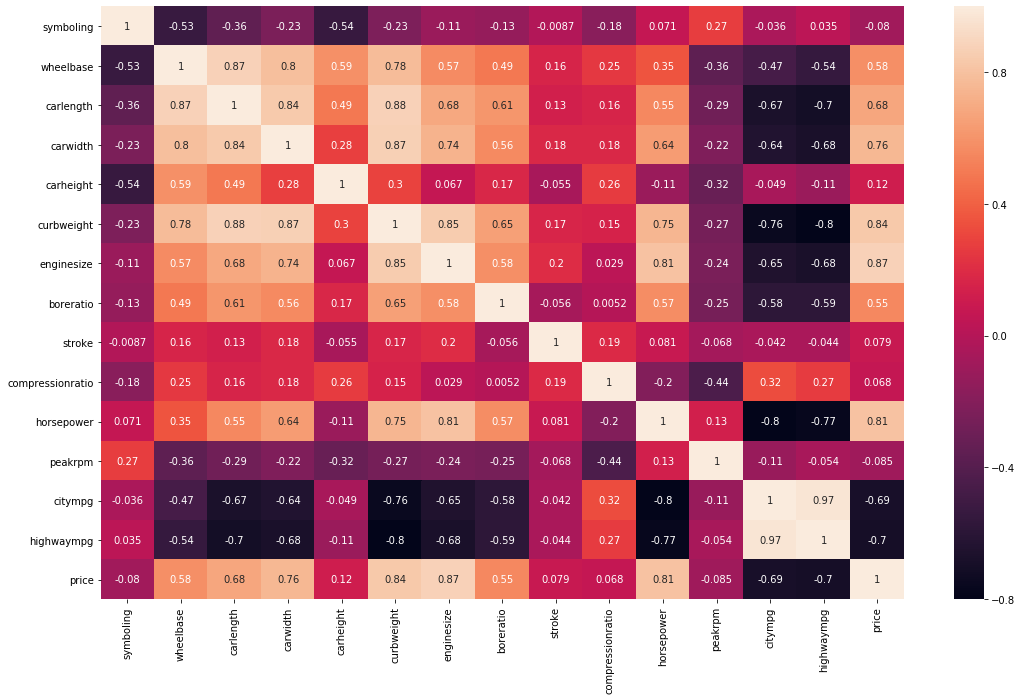

In [21]:
#Let's see the correlation amoung the numeric variables
plt.figure(figsize = (18,24))
plt.subplot(2, 1, 1)
sns.heatmap(car.corr(), annot =  True)
plt.show()

From the above heatmap, we can see that some are highly correlated where as some are negatively correlated.
As price is being predicted here, so now let's observe how price correlates to other variables -

1. price is negatively correlated with symboling, peakrpm, citympg and highwaympg
2. price has a very low correlation with carheight, stroke and compressionratio.
3. price shows a decent correlation with wheelbase, carlength, boreratio.
4. price is highly correlated to carwidth, crubweight, enginesize and horsepower

Let's also have a look at the categorical variables we have in the data.

Symboling is a categorical variable which has been treated as a numeric int64 type variable. Let's convert the symboling variable.
Here Symboling is assigned for insurance risk rating,A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
Let's make the category clear by classifying based on risk

1. -ve symboling as safe
2. 0, 1 as moderate
3. 2,3 as risky

In [22]:
car['symboling'] = car['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [23]:
#let's have a look on the categorical variables
cat_var = list(car.columns[car.dtypes == 'object'])
cat_var

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company_name']

In [24]:
# Solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. 
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [25]:
# Let's have a look on the market percentage of cars with respect to features
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(40, 35))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

We can identify the some of the car features that are predominant in the US Automobile Market.
Also, by these plots we can say that Geely Automotives can consider these to fullfill the market dominant needs and make the needed changes to their manufacturing line. 

Now, let's go through the most popular Automobile company in the US Automobile Market.

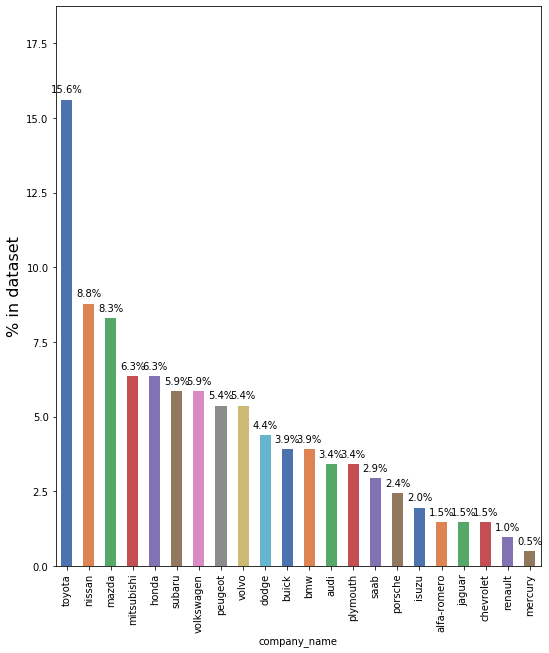

In [26]:
plot_percentages(car,[cat_var[-1]])

So, from this we can clearly say that 'Toyota' has the most popular market in US. 

Now,let's find out how these categorical variables relate with each other on the outcome variable price.

In [27]:
def plot_cat(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car)
    plt.show()

## Custom function Definition for model fitting

In [28]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Adding a constant variable  
# Creating X_train dataframe with the selected variables
    X_train = sm.add_constant(X_train)
    lr = sm.OLS(y_train,X_train).fit() 
    print(lr.summary())
    return lr

In [29]:
def getVIF(X_train):
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

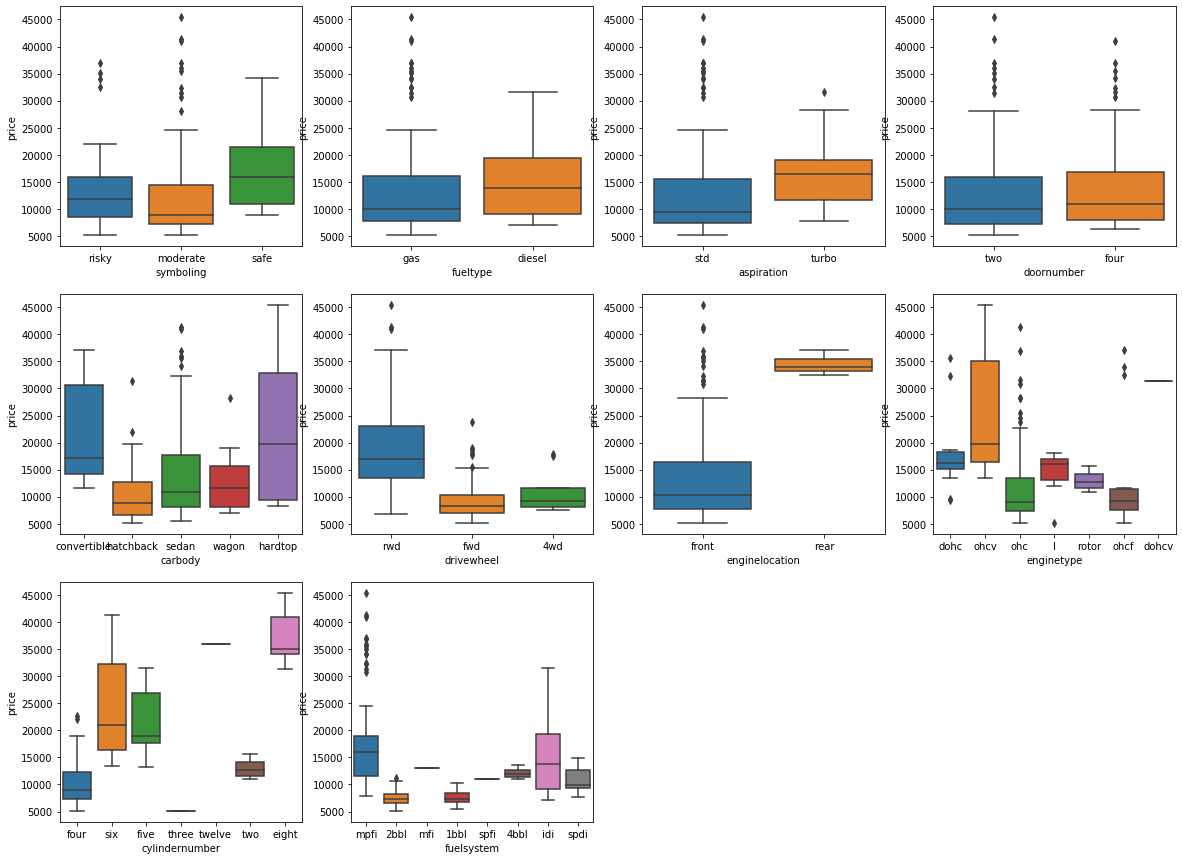

In [30]:
# ploting all variables excluding car_company against the output variable
plot_cat(cat_var[:-1])

## Observations:

1. fuel type has an effect on the pricing of the cars. 
2. enginelocation and aspiration has a visible affect on the pricing of the car
3. The price of real wheel drive is significantly higher than other drivewheel options.
4. cylindernumber and engine type also seem to regulate the price of cars.
5. hardtop and convertables cars are priced higher than other body types available.

Let's see how the prices vary with the different automobile companies in the US market

In [31]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg   

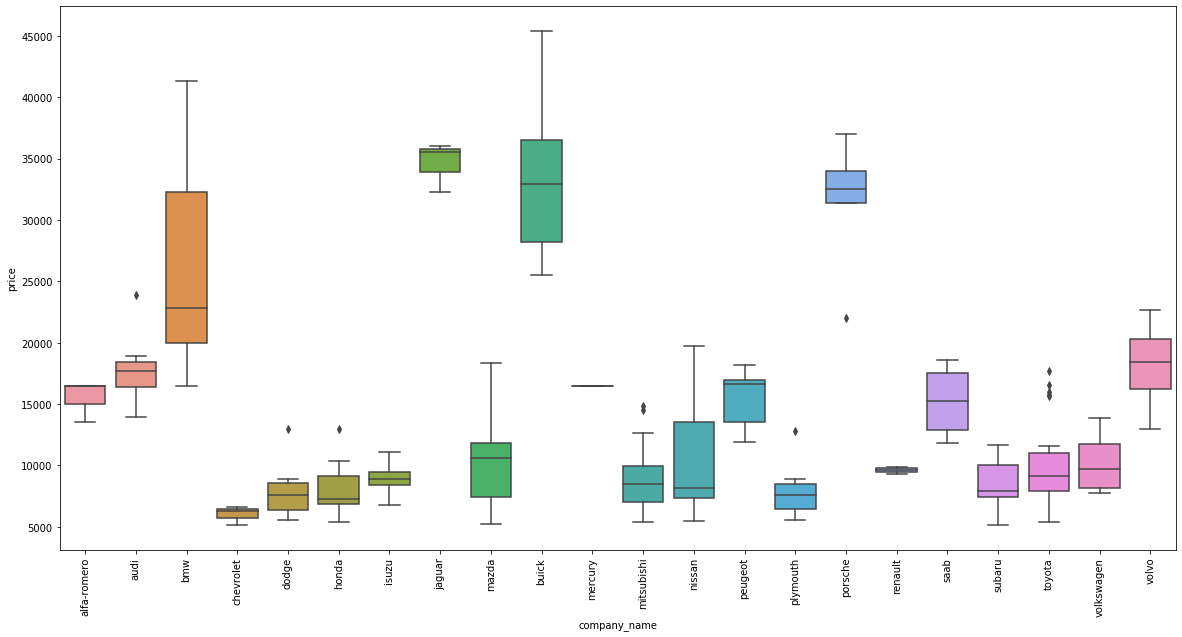

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x = cat_var[-1], y = 'price', data = car)
plt.xticks(rotation=90)
plt.show()

In [33]:
print('Average car price in US: ',car['price'].mean())
print(car.groupby('company_name').price.mean().sort_values(ascending=False).head())

Average car price in US:  13276.710570731706
company_name
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


## Observations

1. There are few outilers for these companies showing that they manufacture some expensive cars which are priced above their usual market pricing range.
2. Cars manufacturers like jaguar, Buick, Porsche, BMW, Volo are clearly on the high price.
3. Also, the company names shows some affect on the price determination.

Now, let us check how multiple categorical variables affect the pricing of cars.

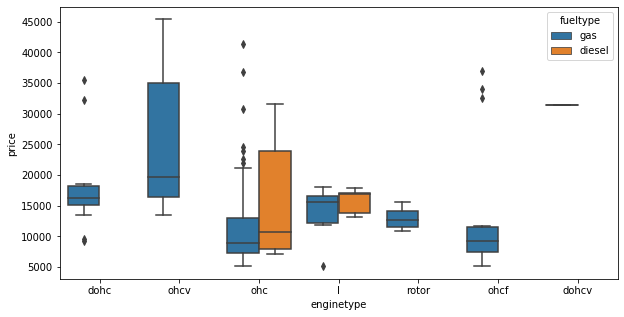

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=car)
plt.show()


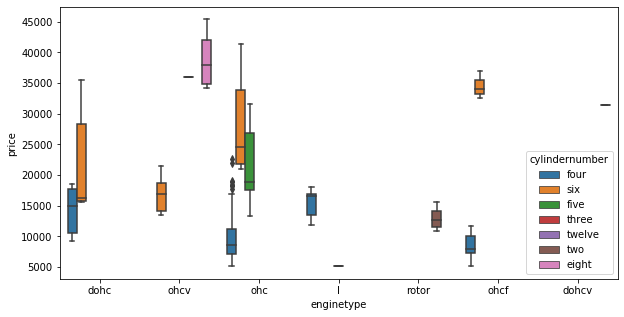

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=car)
plt.show()

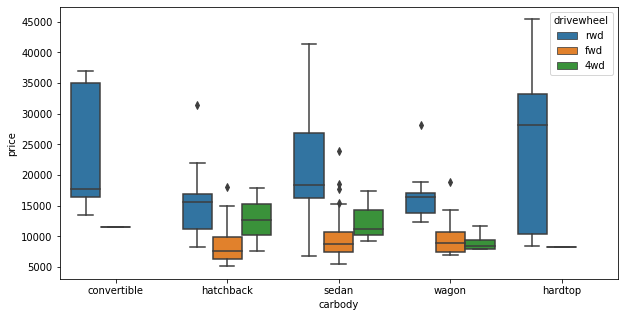

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=car)
plt.show()

Now, we must check if we will be dealing with any Outliers because Linear Regression is very highly sensitive to the outliers.

In [37]:
numeric_vars = list(car.columns[car.dtypes != 'object'])
print(numeric_vars)


['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


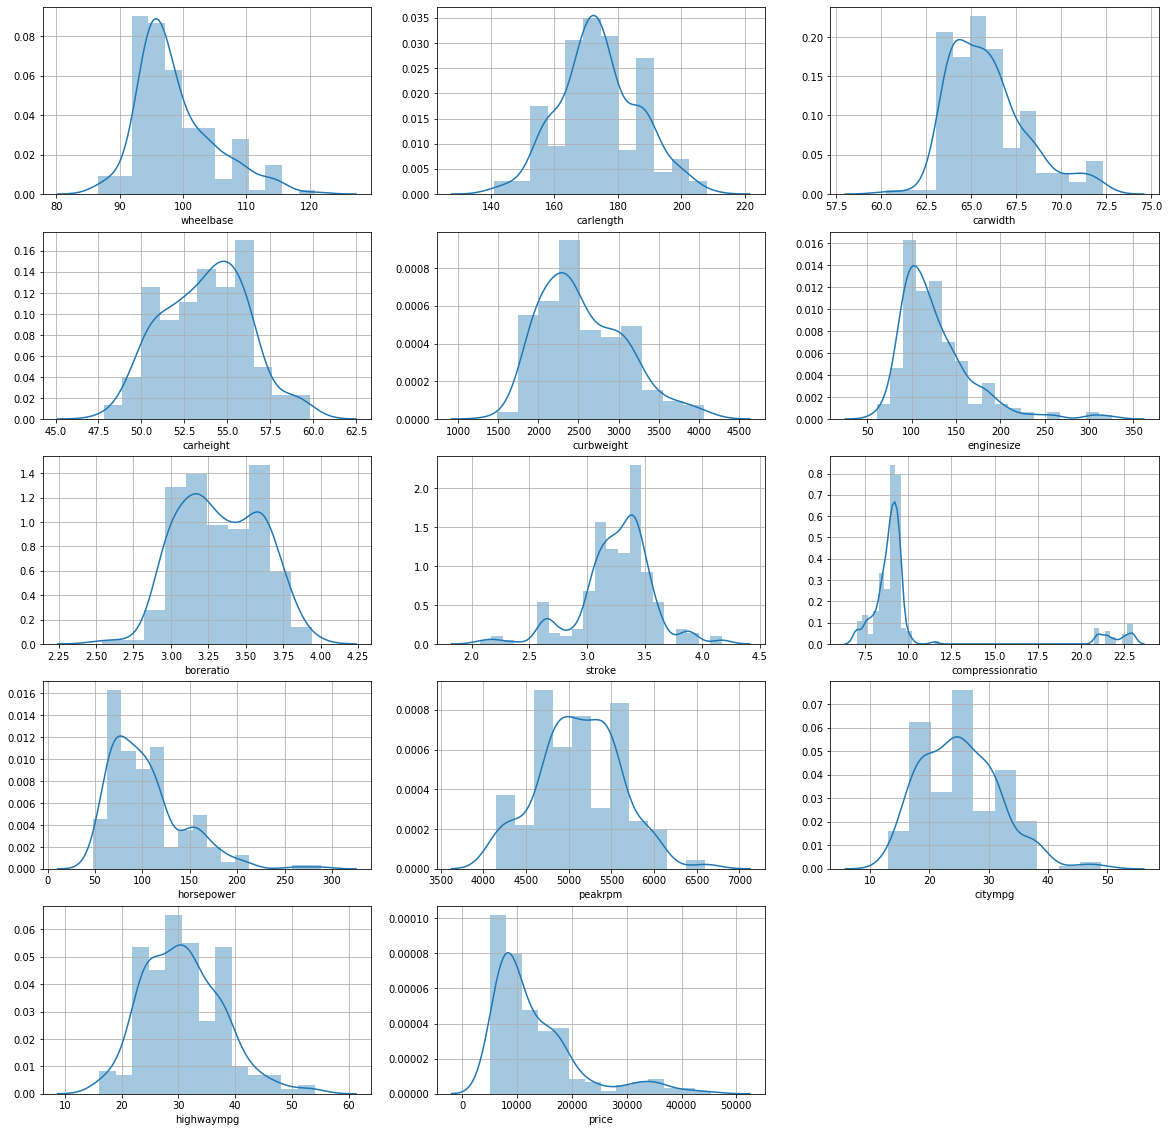

In [38]:
plt.figure(figsize=(20, 20))

for i, val in enumerate(numeric_vars): 
    plt.subplot(5,3,i+1)
    plt.grid(True)
    sns.distplot(car[val])

plt.show()

We see enginesize, horsepower and compression ratio variables are having a right skewed distribution, this is due to the outliers present in the variable.

In [39]:
print(car[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(car[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


Let's treat the outliers by clipping the variables 'curbweight','horsepower','enginesize' at 96 precentile value and clip compressionratio at 90 percentile value.

In [40]:
#Outliers in price of cars
car['horsepower'][np.abs(car['horsepower'] > 182.00)]= 182.00
car['curbweight'][np.abs(car['curbweight'] > 3657.80)]= 3657.80
car['enginesize'][np.abs(car['enginesize'] > 209.00)]= 209.00
car['compressionratio'][np.abs(car['compressionratio'] > 10.94)]= 10.94

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

Lets keep car data for which the price is less than standard deviation : 3.

In [41]:
car= car[np.abs(car.price-car.price.mean()) <= (3*car.price.std())]

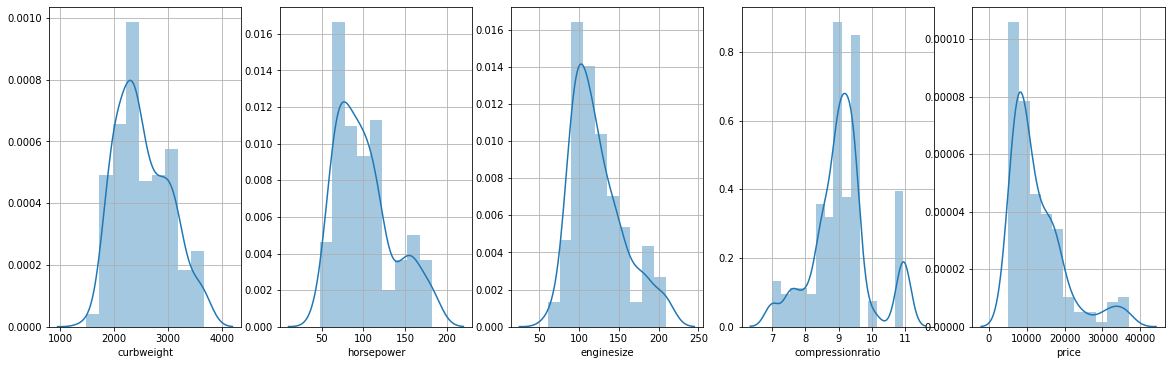

In [42]:
list_var = ['curbweight', 'horsepower', 'enginesize', 'compressionratio', 'price']

plt.figure(figsize=(20, 20))

for i, val in enumerate(list_var): 
    plt.subplot(3,5,i+1)
    plt.grid(True)
    sns.distplot(car[val])

plt.show()

Earlier, from the heatmap, we noticed there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Lets create new variables from these to try reducing the multicolinearlity.

In [43]:
# Creating new variable car_lw_ratio
car['car_lw_ratio'] = car.carlength/car.carwidth
# Creating new variable car_wh_ratio
car['car_wh_ratio'] = car.carwidth/car.carheight
# Creating new variable pw_ratio
car['ph_ratio'] = car.horsepower/car.curbweight
# Creating new variable hcmpg_ratio
car['hcmpg_ratio'] = car.highwaympg/car.citympg
## droping the orignal variables
car.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Let's create a company_segment categorical variable which will tell us that under which segment tier does the company_name comes.
We will segment the car companies based on the mean company price as

1. lowtier if company mean price is below 10,000
2. midtier if company mean price is above 10,000 and below 20,000
3. hightier if company mean price is above 20,000

In [44]:
car.groupby('company_name').price.mean().sort_values(ascending=False)

company_name
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [45]:
company_segment_dict = {
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    }
car['company_segment'] = car['company_name'].map(company_segment_dict)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
# Dropping the orignal car_company variable
car.drop('company_name',axis=1,inplace=True)
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,car_lw_ratio,car_wh_ratio,ph_ratio,hcmpg_ratio,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,2548.0,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,2548.0,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823.0,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,2337.0,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,2824.0,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [47]:
car.groupby('company_segment').price.mean()

company_segment
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

Handelling categorical variables.

In [48]:
# Converting categorical variables with two levels (1 or 0)
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})
car.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,car_lw_ratio,car_wh_ratio,ph_ratio,hcmpg_ratio,company_segment
0,risky,1,1,1,convertible,rwd,1,88.6,2548.0,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,1,1,1,convertible,rwd,1,88.6,2548.0,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,1,1,1,hatchback,rwd,1,94.5,2823.0,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,1,1,0,sedan,fwd,1,99.8,2337.0,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,1,1,0,sedan,4wd,1,99.4,2824.0,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [49]:
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'car_lw_ratio',
       'car_wh_ratio', 'ph_ratio', 'hcmpg_ratio', 'company_segment'],
      dtype='object')

In [50]:
# Now let's create dummy variables
df = pd.get_dummies(car)
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'car_lw_ratio', 'car_wh_ratio',
       'ph_ratio', 'hcmpg_ratio', 'symboling_moderate', 'symboling_risky',
       'symboling_safe', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_segm

In [51]:
# Drop 1 dummy variable and keep n-1 varaibles for each feature 
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_segment_lowtier'],axis=1,inplace=True)
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'car_lw_ratio', 'car_wh_ratio',
       'ph_ratio', 'hcmpg_ratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_hightier', 'company_segment_midtier'],
      dtype='object')

Let's now split our test_train data.

In [52]:
df_train, df_test = train_test_split(df, train_size = 0.70, random_state = 100)

In [53]:
# Using MinMaxScaler to scale all the numeric variables in the scale between 0 and 1.
scaler = MinMaxScaler()

In [54]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','car_lw_ratio','car_wh_ratio','ph_ratio','hcmpg_ratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
1,1,1,1,1,0.068966,0.488524,0.466216,0.664286,0.290476,0.507614,...,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.358098,0.250000,0.500000,0.480952,0.609137,...,0,0,0,0,0,1,0,0,0,0
197,1,1,0,1,0.610345,0.716195,0.540541,0.885714,0.514286,0.634518,...,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.489907,0.574324,0.771429,0.680952,0.583756,...,0,0,0,0,0,1,0,0,0,0
190,1,1,1,1,0.272414,0.337819,0.324324,0.464286,0.633333,0.380711,...,0,0,0,0,0,1,0,0,0,1


In [55]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.886525,0.794326,0.439716,0.985816,0.413402,0.486298,0.420979,0.559980,0.551570,0.536415,...,0.028369,0.333333,0.021277,0.113475,0.0,0.425532,0.042553,0.007092,0.106383,0.468085
std,0.318304,0.405634,0.498122,0.118672,0.198892,0.228357,0.225970,0.192528,0.150278,0.229812,...,0.166616,0.473085,0.144819,0.318304,0.0,0.496186,0.202567,0.084215,0.309426,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.302793,0.243243,0.421429,0.490476,0.406091,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.358621,0.426767,0.337838,0.550000,0.571429,0.507614,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.656282,0.540541,0.742857,0.633333,0.609137,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# create X and y
y_train = df_train.pop('price')
X_train = df_train

### RFE Model

In [57]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting best 15 features which describes the price of cars
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 10),
 ('aspiration', False, 9),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 14),
 ('enginesize', False, 8),
 ('boreratio', True, 1),
 ('stroke', False, 6),
 ('compressionratio', False, 16),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('car_lw_ratio', True, 1),
 ('car_wh_ratio', True, 1),
 ('ph_ratio', True, 1),
 ('hcmpg_ratio', False, 18),
 ('symboling_moderate', False, 27),
 ('symboling_safe', False, 22),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 21),
 ('carbody_sedan', False, 15),
 ('carbody_wagon', False, 25),
 ('drivewheel_fwd', False, 28),
 ('drivewheel_rwd', False, 24),
 ('enginetype_dohc', False, 4),
 ('enginetype_dohcv', False, 30),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 29),
 ('enginetype_rotor', False, 12),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cy

In [59]:
cols = X_train.columns[rfe.support_]
cols

Index(['enginelocation', 'wheelbase', 'boreratio', 'horsepower', 'peakrpm',
       'car_lw_ratio', 'car_wh_ratio', 'ph_ratio', 'carbody_convertible',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_4bbl', 'company_segment_hightier'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight', 'enginesize',
       'stroke', 'compressionratio', 'hcmpg_ratio', 'symboling_moderate',
       'symboling_safe', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_segment_midtier'],
      dtype='object')

#### Use statsmodel for detailed statistics.

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [62]:
lm = fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.29e-74
Time:                        22:43:47   Log-Likelihood:                 220.53
No. Observations:                 141   AIC:                            -409.1
Df Residuals:                     125   BIC:                            -361.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


"fuelsystem_4bbl" has p-value > 0.05. That means, this variable does not have enough impact. So, we can decide to drop it.

In [63]:
X_train1 = X_train_rfe.drop('fuelsystem_4bbl', axis=1)

In [64]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.22e-75
Time:                        22:44:01   Log-Likelihood:                 219.34
No. Observations:                 141   AIC:                            -408.7
Df Residuals:                     126   BIC:                            -364.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

"cylindernumber_five" has p-value > 0.05. That means, this variable also does not have enough impact. So, we can decide to drop it.

In [65]:
X_train2 = X_train1.drop('cylindernumber_five', axis=1)

In [66]:
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.07e-76
Time:                        22:44:18   Log-Likelihood:                 218.98
No. Observations:                 141   AIC:                            -410.0
Df Residuals:                     127   BIC:                            -368.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

"cylindernumber_six" has p-value > 0.05. That means, this variable also does not have enough impact. So, we can decide to drop it.

In [67]:
X_train3 = X_train2.drop('cylindernumber_six', axis=1)

In [68]:
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.66e-76
Time:                        22:44:30   Log-Likelihood:                 217.90
No. Observations:                 141   AIC:                            -409.8
Df Residuals:                     128   BIC:                            -371.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

"car_lw_ratio " has p-value > 0.05. That means, this variable also does not have enough impact. So, we can decide to drop it.

In [69]:
X_train4 = X_train3.drop('car_lw_ratio', axis=1)

In [70]:
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     216.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.68e-77
Time:                        22:44:42   Log-Likelihood:                 217.43
No. Observations:                 141   AIC:                            -410.9
Df Residuals:                     129   BIC:                            -375.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [71]:
getVIF(X_train4)

,Features,VIF
6,ph_ratio,75.27
3,horsepower,59.01
0,enginelocation,39.23
1,wheelbase,20.43
2,boreratio,18.12
5,car_wh_ratio,13.27
9,cylindernumber_four,10.18
4,peakrpm,8.64
10,company_segment_hightier,2.02
8,cylindernumber_eight,1.49


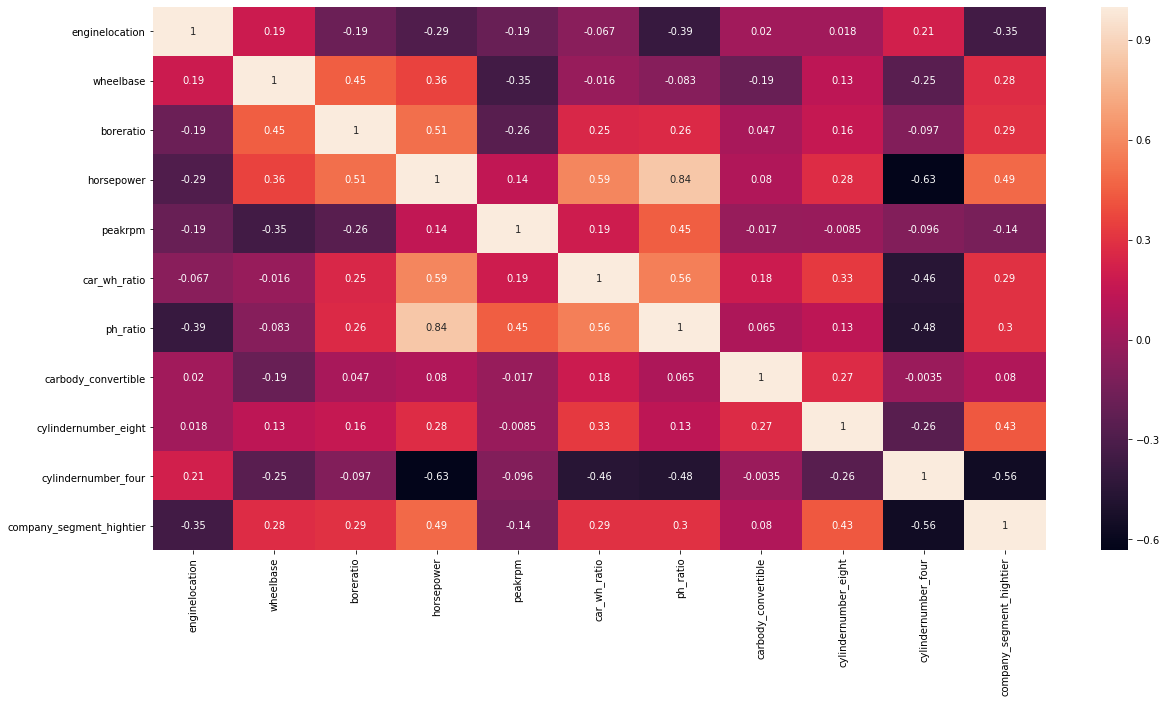

In [72]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train4.corr(),annot = True)

1. car_lw_ratio is having no impact on Adj. R-Squared, so, we can decide to remove it.
2. ph_ratio is having the highest VIF and is strongly corelated with horsepower, car_wh_ratio and peakrpm. We can decide to remove it.

In [73]:
X_train5 = X_train4.drop('ph_ratio', axis=1)

In [74]:
lm5=fit_LRM(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.96e-70
Time:                        22:45:17   Log-Likelihood:                 195.94
No. Observations:                 141   AIC:                            -369.9
Df Residuals:                     130   BIC:                            -337.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
getVIF(X_train5)

,Features,VIF
0,enginelocation,31.47
2,boreratio,18.12
5,car_wh_ratio,13.27
3,horsepower,12.28
1,wheelbase,11.31
8,cylindernumber_four,9.38
4,peakrpm,6.16
9,company_segment_hightier,1.98
7,cylindernumber_eight,1.39
6,carbody_convertible,1.24


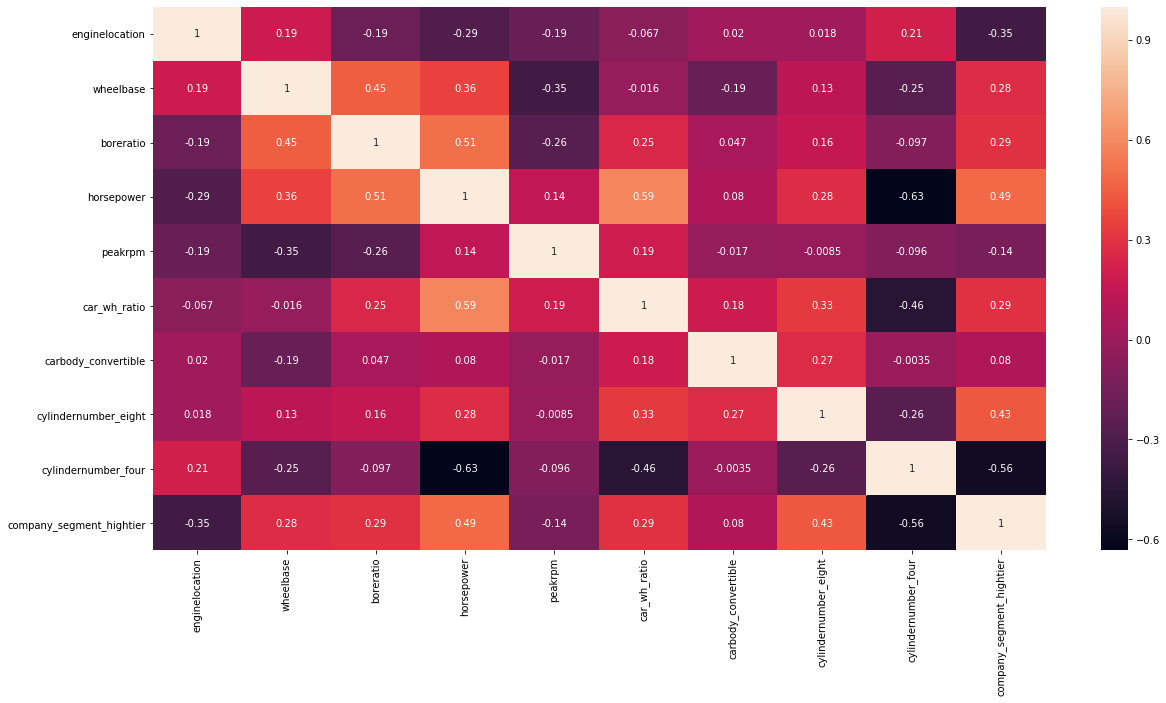

In [76]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train5.corr(),annot = True)

1. After removing ph_ratio the Adj. R-Squared to 0.925
2. peakrpm is having high p-value. So, we remove it.

In [77]:
X_train6 = X_train5.drop('peakrpm', axis=1)

In [79]:
lm6=fit_LRM(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.76e-71
Time:                        22:46:36   Log-Likelihood:                 195.94
No. Observations:                 141   AIC:                            -371.9
Df Residuals:                     131   BIC:                            -342.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

"cylindernumber_eight" is having p-value > 0.05, which is making the model insignificant. So, we can decide to remove it.

In [80]:
X_train7 = X_train6.drop('cylindernumber_eight', axis=1)

In [81]:
lm7=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     216.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.85e-72
Time:                        22:47:15   Log-Likelihood:                 194.67
No. Observations:                 141   AIC:                            -371.3
Df Residuals:                     132   BIC:                            -344.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

1. "boreratio" is having p-value > 0.05 . We decide to remove this.

In [82]:
X_train8 = X_train7.drop('boreratio', axis=1)

In [83]:
lm8=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.81e-73
Time:                        22:47:36   Log-Likelihood:                 194.15
No. Observations:                 141   AIC:                            -372.3
Df Residuals:                     133   BIC:                            -348.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [84]:
getVIF(X_train8)

,Features,VIF
0,enginelocation,26.46
3,car_wh_ratio,12.55
1,wheelbase,8.74
2,horsepower,8.37
5,cylindernumber_four,6.89
6,company_segment_hightier,1.72
4,carbody_convertible,1.13


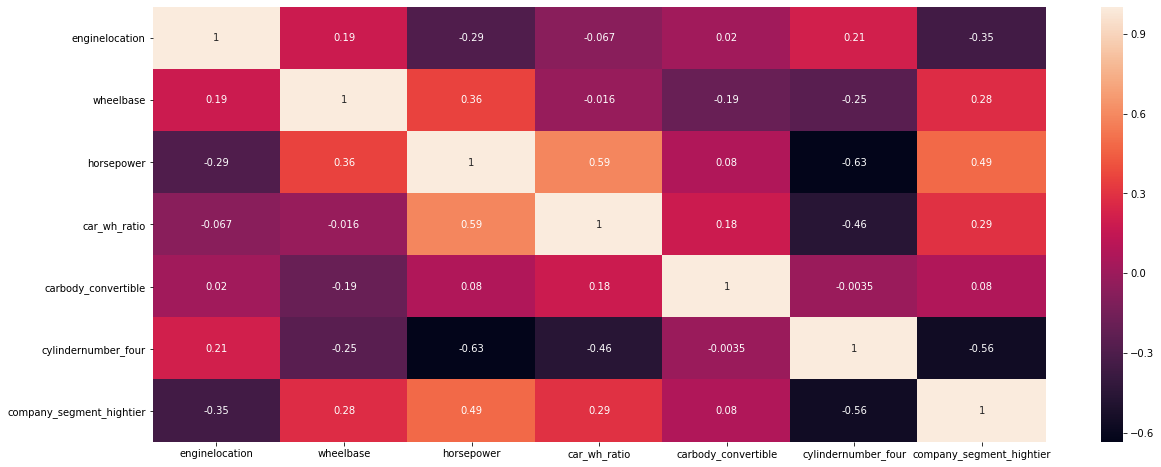

In [85]:
plt.figure(figsize = (20,8))  
sns.heatmap(X_train8.corr(),annot = True)

"enginelocation" is having the high VIF. So, we decide to remove this.

In [86]:
X_train9 = X_train8.drop('enginelocation', axis=1)

In [87]:
lm9=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.82e-68
Time:                        22:48:10   Log-Likelihood:                 179.41
No. Observations:                 141   AIC:                            -344.8
Df Residuals:                     134   BIC:                            -324.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [88]:
getVIF(X_train9)

,Features,VIF
1,horsepower,8.35
2,car_wh_ratio,8.05
0,wheelbase,5.76
4,cylindernumber_four,3.63
5,company_segment_hightier,1.72
3,carbody_convertible,1.13


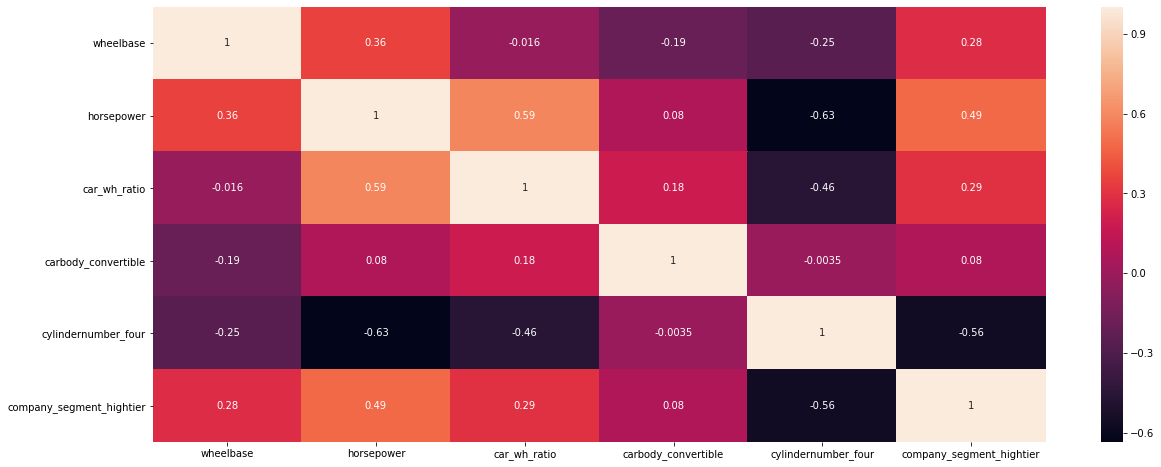

In [89]:
plt.figure(figsize = (20,8))  
sns.heatmap(X_train9.corr(),annot = True)

Looking into the above "heatmap", we can see that "Horsepower" is more bussiness significant variable than car_wh_ratio which also has a high VIF. car_wh_ratio is correlated with "horsepower". So, we decide to remove car_wh_ratio.

In [90]:
X_train10 = X_train9.drop('car_wh_ratio', axis=1)
X_train10 = sm.add_constant(X_train10)
lm10 = sm.OLS(y_train,X_train10).fit() 
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.11e-69
Time:                        22:48:38   Log-Likelihood:                 177.91
No. Observations:                 141   AIC:                            -343.8
Df Residuals:                     135   BIC:                            -326.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [91]:
getVIF(X_train10)

,Features,VIF
0,const,19.89
4,cylindernumber_four,1.95
2,horsepower,1.89
5,company_segment_hightier,1.56
1,wheelbase,1.24
3,carbody_convertible,1.08


Adj. R-Squared is 0.907 which is quite a significant fit. So, we will now maintain these as our final model variables.

### Residual Analysis of the train data
Now let's check if the error terms are also normally distributed.

In [92]:
y_train_price = lm10.predict(X_train10)

Text(0.5, 0, 'Errors')

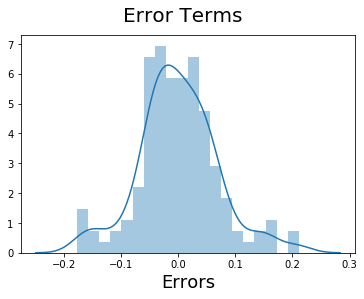

In [93]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

Error almost touches zero, so, considering the size of the train and test data this error distribution is almost very close to a normal distribution.

### Making Predictions

Firstly, we test the test set before making any conclusion on the equation of linear regression.

In [94]:
num_variables = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','car_lw_ratio','car_wh_ratio','ph_ratio','hcmpg_ratio','stroke','compressionratio','peakrpm','price']
df_test[num_variables] = scaler.transform(df_test[num_variables])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [95]:
y_test = df_test.pop('price')
X_test = df_test

In [96]:
# Creating X_test_sm dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_sm = X_test[X_train10.columns]

In [97]:
# Adding a constant variable to the test set
X_test_sm = sm.add_constant(X_test_sm)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [98]:
# Making predictions
y_pred = lm10.predict(X_test_sm)

In [99]:
y_pred

143    0.158610
104    0.349684
32     0.026560
91     0.060181
186    0.134479
         ...   
41     0.170816
195    0.289445
120    0.048946
70     0.815321
166    0.180508
Length: 61, dtype: float64

### Model Evaluation

Text(0, 0.5, 'y_pred')

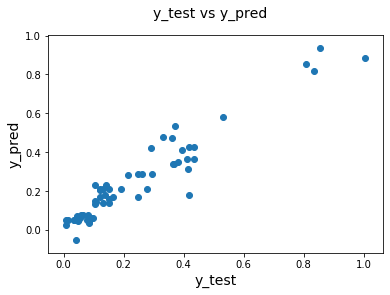

In [100]:
# Plot y_test and y_pred to visualize the difference.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=14)              # Heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=14)                          # Y-label

In [102]:
#r2
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model r2_score: 0.9056388935908384


#### Conclusion
From the last updated model we have our variables in admissible limits and the model looks to be stable. The error terms are also normally distributed. 

Variables that impact on the business:
1. wheelbase
2. horsepower
3. carbody_convertible
4. cylindernumber_four
5. company_segment_hightier

The final equation of the for our best fitted line would be:

price = -0.0133+(0.3058 x wheelbase) + (0.3750 x horsepower) + (0.1785 x carbody_convertible) + (-0.0686 x cylindernumber_four) + (0.3129 x company_segment_hightier)
